
# 1. Ключевые метрики:
1.1 Распределение "сумма всех товаров в корзине - общее время сборки и доставки" с разбивкой графиков по ритейлерам и разбивкой данных по городам. Приведено в ниже в текущем ноутбуке. Считаю, что нужно видеть приход денег, чтобы посчитать чистую прибыль, а также понимать затраченное время на сборку и доставку. Дополнительно необходимо отслеживать - кто из ритейлеров и в каких городах лучше всего справляется с поставленной задачей, а кто нет, и куда нужно вмешиваться и решать потенциально возможные проблемы и задачи.

1.2 Распределение "сумма всех товаров в корзине - количество единиц товара" с разбивкой графиков по ритейлерам и разбивкой данных по городам. Приведено в ниже в текущем ноутбуке. Для возможности проследить выручку и затраченное время на сборку плюс доставку заказов, так как второе это затраты на экусплутацию оборудования, зарплаты сотрудников, топливные и ремонтные расходы и прочее.

1.3 Распределение "количество единиц товара в заказе - общий вес заказа" с разбивкой графиков по ритейлерам и разбивкой данных по общей стоимости заказа. Приведено в ниже в текущем ноутбуке.

1.4 Распределение "количество единиц товара в заказе - общий вес заказа" с разбивкой графиков по ритейлерам и разбивкой данных по общему времени сборки и доставки заказов. Приведено в ниже в текущем ноутбуке.






# 2. Инсайты/выводы:
2.1 Графики распределений разнообразны, в зависимости от текущих целей и задач требуется провести более детальный анализ, но уже в более конкретном направлении.

2.2 Определяем 20 магазинов с самым большим количеством замен и отмен товаров.Приведено в ниже в текущем ноутбуке. С данными магазинами нужно поработать в плане наладки и оптимизации процессов формирования буфера и оперативной выкладки "проблемных" наиболее восстребованных товаров.

2.3 Определяем 50 товаров с самым вольшим количеством замен и отмен. Приведено в ниже в текущем ноутбуке. Данным товарам нужно уделить большее внимание в плане формирования буфера в магазине, а также внимание к оперативной выкладке на полки.

2.4 Некоторых данных недостаточно. Например географические координаты адресов доставки указаны, а координат магазинов нет. То есть мы не понимаем откуда мы везем. При наличии их можно было бы посчитать преодолеваемое расстояние во время доставки каждого заказа, сравнить позиции по ритейлерам, магазинам, городам.

In [ ]:
#импортируем необходимые для работы бибилиотеки
import psycopg2
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [ ]:
# подключаемся к базе данных и делаем выборку 

connection = psycopg2.connect(
        host='***',
        user='***',
        password='***',
        database='***',
        port=0000,
        sslmode='***'
    )
df_orders = pd.read_sql ("SELECT * FROM orders", connection)
df_delivery_windows = pd.read_sql ("SELECT * FROM delivery_windows", connection)
df_stores = pd.read_sql ("SELECT * FROM stores", connection)
df_addresses = pd.read_sql ("SELECT * FROM addresses", connection)
df_replacements = pd.read_sql ("SELECT * FROM replacements", connection)
df_cancellations = pd.read_sql ("SELECT * FROM cancellations", connection)

In [ ]:
#смотрим краткую сводку для таблицы заказов
df_orders.count()

id                    720433
user_id               720433
total_cost            720433
cost                  720433
item_total            720433
promo_total           720433
total_weight          720433
total_quantity        720433
state                 720433
shipped_at            720433
created_at            720433
ship_address_id       720433
store_id              720433
delivery_window_id    720433
dtype: int64

In [ ]:
#смотрим краткую сводку для таблицы временного слота доставки
df_delivery_windows.count()

store_id     204343
id           204343
starts_at    204343
ends_at      204343
time_zone    204343
dtype: int64

In [ ]:
#смотрим краткую сводку для таблицы списка городов и ритейлеров
df_stores.count()

id             162
city           162
retailer_id    162
dtype: int64

In [ ]:
#смотрим краткую сводку для таблицы географических координат адресов доставки
df_addresses.count()

lat         1492303
lon         1492303
id          1492303
elevator     342532
floor       1492303
dtype: int64

In [ ]:
#смотрим краткую сводку для таблицы замененных товаров
df_replacements.count()

order_id    1250244
item_id     1250244
state       1250244
dtype: int64

In [ ]:
#смотрим краткую сводку для таблицы отмененных товаров
df_cancellations.count()

order_id    1441605
item_id     1441605
state       1441605
dtype: int64

In [ ]:
#объединяем таблицу заказов и таблицу временного слота доставки
df_orders.rename(columns={'id': 'id_order'}, inplace=True)
ndf1_orders = df_orders.merge(df_delivery_windows, how = 'left', left_on = 'delivery_window_id', right_on = 'id' )
ndf1_orders.count()

id_order              720433
user_id               720433
total_cost            720433
cost                  720433
item_total            720433
promo_total           720433
total_weight          720433
total_quantity        720433
state                 720433
shipped_at            720433
created_at            720433
ship_address_id       720433
store_id_x            720433
delivery_window_id    720433
store_id_y            720429
id                    720429
starts_at             720429
ends_at               720429
time_zone             720429
dtype: int64

In [ ]:
#добавляем таблицу списка городов и ритейлеров
ndf2_orders = ndf1_orders.merge(df_stores, how = 'left', left_on = 'store_id_x', right_on = 'id' )
ndf2_orders.count()

id_order              720433
user_id               720433
total_cost            720433
cost                  720433
item_total            720433
promo_total           720433
total_weight          720433
total_quantity        720433
state                 720433
shipped_at            720433
created_at            720433
ship_address_id       720433
store_id_x            720433
delivery_window_id    720433
store_id_y            720429
id_x                  720429
starts_at             720429
ends_at               720429
time_zone             720429
id_y                  720433
city                  720433
retailer_id           720433
dtype: int64

In [ ]:
#добавляем таблицу географических координат адресов доставки
ndf3_orders = ndf2_orders.merge(df_addresses, how = 'left', left_on = 'ship_address_id', right_on = 'id' )
ndf3_orders.count()

id_order              729993
user_id               729993
total_cost            729993
cost                  729993
item_total            729993
promo_total           729993
total_weight          729993
total_quantity        729993
state                 729993
shipped_at            729993
created_at            729993
ship_address_id       729993
store_id_x            729993
delivery_window_id    729993
store_id_y            729989
id_x                  729989
starts_at             729989
ends_at               729989
time_zone             729989
id_y                  729993
city                  729993
retailer_id           729993
lat                   729947
lon                   729947
id                    729947
elevator              271495
floor                 729947
dtype: int64

In [ ]:
#смотрим итог объединения таблиц
ndf3_orders.head(3)

,id_order,user_id,total_cost,cost,item_total,promo_total,total_weight,total_quantity,state,shipped_at,created_at,ship_address_id,store_id_x,delivery_window_id,store_id_y,id_x,starts_at,ends_at,time_zone,id_y,city,retailer_id,lat,lon,id,elevator,floor
0,756927,139676,0.0,0.0,5015,0.0,37708,39,shipped,2018-08-26 15:01:42,2018-08-26 02:06:55,888330,1,226459,1.0,226459.0,2018-08-26 14:00:00,2018-08-26 16:00:00,Europe/Moscow,1,1,1,55.855683,37.644165,888330.0,None,3
1,756963,139682,0.0,0.0,7096,0.0,49435,71,shipped,2018-08-26 16:28:41,2018-08-26 05:43:20,888394,1,226460,1.0,226460.0,2018-08-26 15:00:00,2018-08-26 17:00:00,Europe/Moscow,1,1,1,55.858791,37.638656,888394.0,passenger,8
2,756983,63967,299.0,299.0,2724,-250.0,11590,32,shipped,2018-08-26 15:09:11,2018-08-26 06:12:13,888420,1,226459,1.0,226459.0,2018-08-26 14:00:00,2018-08-26 16:00:00,Europe/Moscow,1,1,1,55.890288,37.612822,888420.0,passenger,3


In [ ]:
#делаем выборку приоритетных колонок
ndf4_orders = ndf3_orders[['user_id', 'id_order','created_at', 'starts_at', 'shipped_at',	'ends_at', 'state', 'city',	'retailer_id', 'store_id_x',	'lat', 'lon', 'item_total', 'promo_total', 'cost', 'total_cost', 'total_quantity', 'total_weight']]

In [ ]:
#сортируем по времени создания заказа и времени начала слота доставки
ndf5_orders = ndf4_orders.sort_values(by=['starts_at','created_at'])
ndf5_orders.head(5)

,user_id,id_order,created_at,starts_at,shipped_at,ends_at,state,city,retailer_id,store_id_x,lat,lon,item_total,promo_total,cost,total_cost,total_quantity,total_weight
382690,4225,756916,2018-08-26 00:07:14,2018-08-26 08:00:00,2018-08-26 11:13:14,2018-08-26 10:00:00,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104
240834,113740,756958,2018-08-26 05:38:12,2018-08-26 08:00:00,2018-08-26 07:46:10,2018-08-26 10:00:00,shipped,1,1,11,55.788854,37.463587,3512,0.0,299.0,299.0,11,9176
500473,96268,757015,2018-08-26 06:53:51,2018-08-26 09:00:00,2018-08-26 10:36:29,2018-08-26 10:00:00,shipped,2,1,63,55.762961,49.202657,2707,0.0,149.0,149.0,107,37370
382697,91917,757024,2018-08-26 06:59:44,2018-08-26 10:00:00,2018-08-26 10:41:59,2018-08-26 12:00:00,shipped,1,1,21,55.772973,37.611133,2487,0.0,299.0,299.0,49,8440
482580,96268,757033,2018-08-26 07:03:25,2018-08-26 10:00:00,2018-08-26 09:39:29,2018-08-26 11:00:00,shipped,2,1,62,55.788366,49.103743,4077,0.0,149.0,149.0,62,34940


In [ ]:
#вычисляем общее затраченное время от момента создания заказа до момента закрытия слота доставки и убираем лишние колонки
ndf5_orders['total_time_assembly_and_delivery'] = ndf5_orders.ends_at - ndf5_orders.created_at
ndf6_orders = ndf5_orders[['user_id', 'id_order','total_time_assembly_and_delivery', 'state', 'city',	'retailer_id', 'store_id_x',	'lat', 'lon', 'item_total', 'promo_total', 'cost', 'total_cost', 'total_quantity', 'total_weight']]
ndf6_orders.head(5)

,user_id,id_order,total_time_assembly_and_delivery,state,city,retailer_id,store_id_x,lat,lon,item_total,promo_total,cost,total_cost,total_quantity,total_weight
382690,4225,756916,0 days 09:52:46,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104
240834,113740,756958,0 days 04:21:48,shipped,1,1,11,55.788854,37.463587,3512,0.0,299.0,299.0,11,9176
500473,96268,757015,0 days 03:06:09,shipped,2,1,63,55.762961,49.202657,2707,0.0,149.0,149.0,107,37370
382697,91917,757024,0 days 05:00:16,shipped,1,1,21,55.772973,37.611133,2487,0.0,299.0,299.0,49,8440
482580,96268,757033,0 days 03:56:35,shipped,2,1,62,55.788366,49.103743,4077,0.0,149.0,149.0,62,34940


In [ ]:
#смотрим типы данных ndf6_orders
ndf6_orders.dtypes

user_id                                       int64
id_order                                      int64
total_time_assembly_and_delivery    timedelta64[ns]
state                                        object
city                                          int64
retailer_id                                   int64
store_id_x                                    int64
lat                                         float64
lon                                         float64
item_total                                    int64
promo_total                                 float64
cost                                        float64
total_cost                                  float64
total_quantity                                int64
total_weight                                  int64
dtype: object

In [ ]:
#переводим в секунды общее затраченное время от момента создания заказа до момента закрытия слота доставки
ndf6_orders['total_time_assembly_and_delivery'] = ndf6_orders.total_time_assembly_and_delivery.dt.total_seconds()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#смотрим тип total_time_assembly_and_delivery
ndf6_orders.total_time_assembly_and_delivery.dtype

dtype('float64')

In [ ]:
#посмотрим количество городов
ndf6_orders.city.unique()	

array([ 1,  2,  5,  7,  8, 10, 13])

In [ ]:
#посмотрим количество ритейлеров
ndf6_orders.retailer_id.unique()

array([ 1, 15,  8, 16])

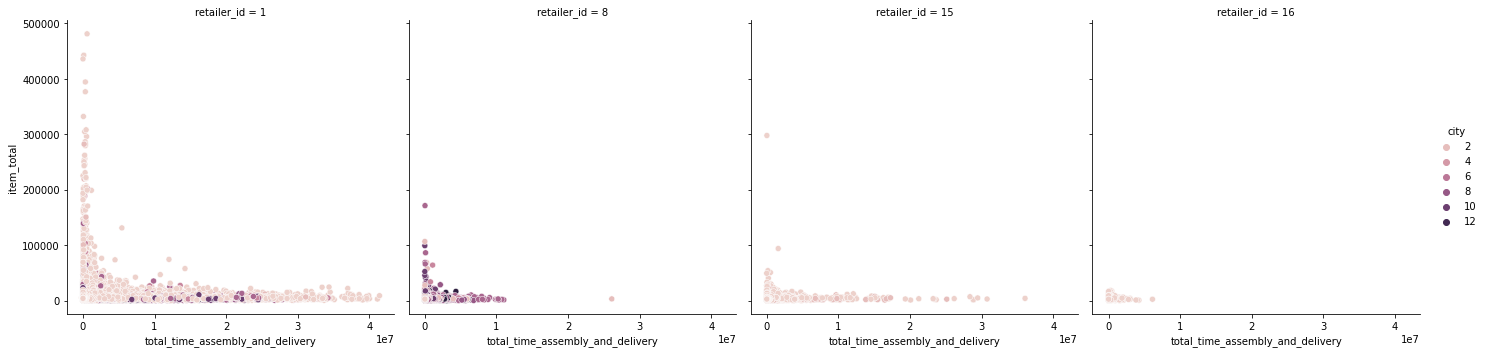

In [ ]:
#отобразим распределение "сумма всех товаров в корзине - общее время сборки и доставки" с разбивкой графиков по ритейлерам и разбивкой данных по городам
fg0 = sns.relplot(data = ndf6_orders, x = 'total_time_assembly_and_delivery', y = 'item_total', kind = 'scatter', col = 'retailer_id', hue = 'city')  
# fg0.figure.set_figwidth(80)
# fg0.figure.set_figheight(20)

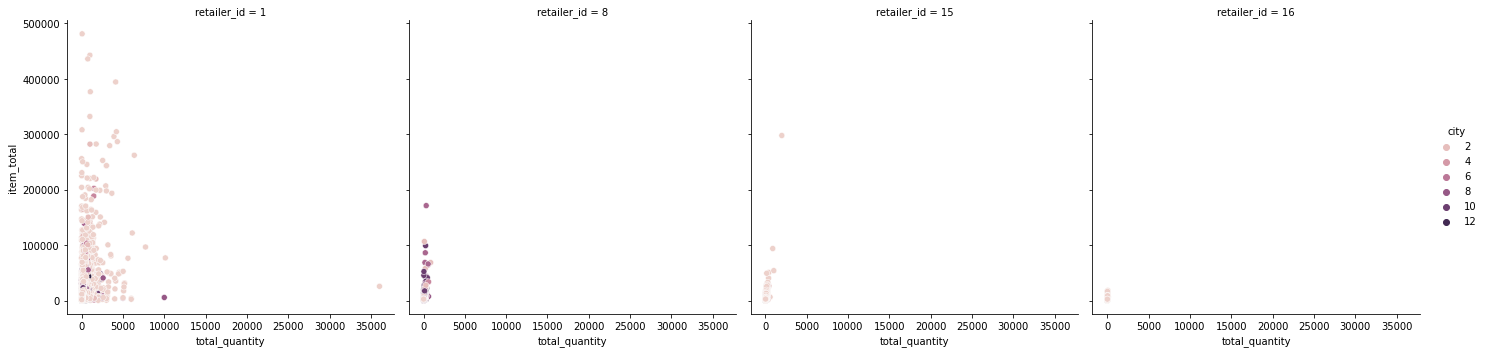

In [ ]:
#отобразим распределение "сумма всех товаров в корзине - количество единиц товара в заказе" с разбивкой графиков по ритейлерам и разбивкой данных по городам
fg1 = sns.relplot(data = ndf6_orders, x = 'total_quantity', y = 'item_total', kind = 'scatter', col = 'retailer_id', hue = 'city')  

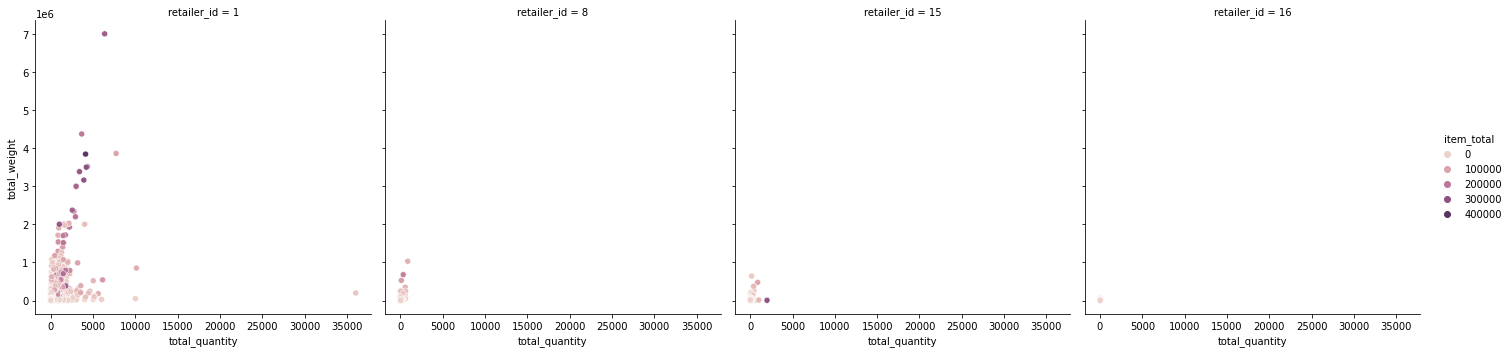

In [ ]:
#отобразим распределение "количество единиц товара в заказе - общий вес заказа" с разбивкой графиков по ритейлерам и разбивкой данных по общей стоимости заказа
fg2 = sns.relplot(data = ndf6_orders, x = 'total_quantity', y = 'total_weight', kind = 'scatter', col = 'retailer_id', hue = 'item_total')  

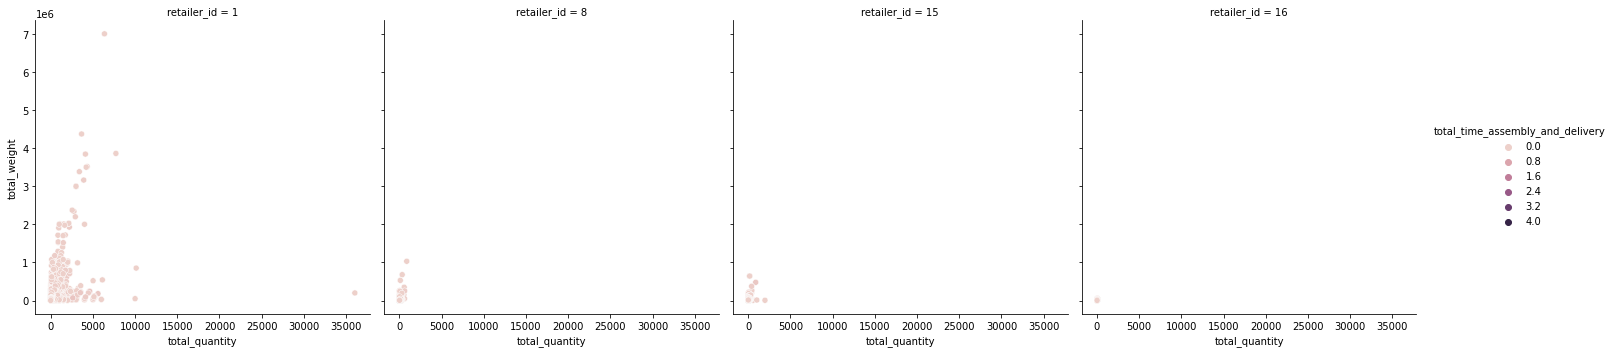

In [ ]:
#отобразим распределение "количество единиц товара в заказе - общий вес заказа" с разбивкой графиков по ритейлерам и разбивкой данных по общему времени сборки и доставки заказов
fg3 = sns.relplot(data = ndf6_orders, x = 'total_quantity', y = 'total_weight', kind = 'scatter', col = 'retailer_id', hue = 'total_time_assembly_and_delivery')
# fg3.figure.set_figwidth(80)
# fg3.figure.set_figheight(20)

In [ ]:
#добавляем к нашей выборке таблицу замененных товаров
df_replacements.rename(columns={'item_id': 'id_item_replace', 'order_id': 'id_order_replace', 'state': 'state_replace'}, inplace=True)
ndf7_orders = ndf6_orders.merge(df_replacements, how = 'left', left_on = 'id_order', right_on = 'id_order_replace')

In [ ]:
#добавляем к нашей выборке таблицу отмененных товаров
df_cancellations.rename(columns={'item_id': 'id_item_cancel', 'order_id': 'id_order_cancel', 'state': 'state_cancel'}, inplace=True)
ndf8_orders = ndf7_orders.merge(df_cancellations, how = 'left', left_on = 'id_order', right_on = 'id_order_cancel')

In [ ]:
ndf8_orders.head(10)

,user_id,id_order,total_time_assembly_and_delivery,state,city,retailer_id,store_id_x,lat,lon,item_total,promo_total,cost,total_cost,total_quantity,total_weight,id_order_replace,id_item_replace,state_replace,id_order_cancel,id_item_cancel,state_cancel
0,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,756916.0,9447232.0,replaced,756916.0,9448086.0,canceled
1,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,756916.0,9447232.0,replaced,756916.0,9448305.0,canceled
2,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,756916.0,9447239.0,replaced,756916.0,9448086.0,canceled
3,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,756916.0,9447239.0,replaced,756916.0,9448305.0,canceled
4,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,756916.0,9447194.0,replaced,756916.0,9448086.0,canceled
5,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,756916.0,9447194.0,replaced,756916.0,9448305.0,canceled
6,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,756916.0,9447188.0,replaced,756916.0,9448086.0,canceled
7,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,756916.0,9447188.0,replaced,756916.0,9448305.0,canceled
8,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,756916.0,9448124.0,replaced,756916.0,9448086.0,canceled
9,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,756916.0,9448124.0,replaced,756916.0,9448305.0,canceled


In [ ]:
ndf9_orders = ndf8_orders[['user_id', 'id_order','total_time_assembly_and_delivery', 'state', 'city',	'retailer_id', 'store_id_x', 'lat', 'lon', 'item_total', 'promo_total', 'cost', 'total_cost', 'total_quantity', 'total_weight', 'id_item_replace',	'state_replace', 'id_item_cancel',	'state_cancel' ]]
ndf9_orders

,user_id,id_order,total_time_assembly_and_delivery,state,city,retailer_id,store_id_x,lat,lon,item_total,promo_total,cost,total_cost,total_quantity,total_weight,id_item_replace,state_replace,id_item_cancel,state_cancel
0,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,9447232.0,replaced,9448086.0,canceled
1,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,9447232.0,replaced,9448305.0,canceled
2,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,9447239.0,replaced,9448086.0,canceled
3,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,9447239.0,replaced,9448305.0,canceled
4,4225,756916,35566.0,shipped,1,1,21,55.766353,37.557816,4130,0.0,249.0,249.0,48,26104,9447194.0,replaced,9448086.0,canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960261,46789,5251456,NaN,shipped,1,1,14,55.686341,37.569372,3697,0.0,249.0,158.0,17,11404,86253240.0,replaced,85776973.0,canceled
3960262,1829563,5408981,NaN,shipped,1,1,1,55.918005,37.710782,11463,0.0,149.0,98.0,20,12855,89426469.0,replaced,89048647.0,canceled
3960263,1829563,5408981,NaN,shipped,1,1,1,55.918005,37.710782,11463,0.0,149.0,98.0,20,12855,89048645.0,replaced,89048647.0,canceled
3960264,1829563,5408981,NaN,shipped,1,1,1,55.918005,37.710782,11463,0.0,149.0,98.0,20,12855,89426574.0,replaced,89048647.0,canceled


In [ ]:
ndf9_orders.count()

user_id                             3960266
id_order                            3960266
total_time_assembly_and_delivery    3960249
state                               3960266
city                                3960266
retailer_id                         3960266
store_id_x                          3960266
lat                                 3960000
lon                                 3960000
item_total                          3960266
promo_total                         3960266
cost                                3960266
total_cost                          3960266
total_quantity                      3960266
total_weight                        3960266
id_item_replace                     3341652
state_replace                       3341652
id_item_cancel                      3519652
state_cancel                        3519652
dtype: int64

In [ ]:
ndf10_orders = ndf9_orders.dropna(subset=['id_item_replace', 'id_item_cancel'], how='any')

In [ ]:
#количество непустых элементов справочно
ndf10_orders.count()

user_id                             3049004
id_order                            3049004
total_time_assembly_and_delivery    3048988
state                               3049004
city                                3049004
retailer_id                         3049004
store_id_x                          3049004
lat                                 3048831
lon                                 3048831
item_total                          3049004
promo_total                         3049004
cost                                3049004
total_cost                          3049004
total_quantity                      3049004
total_weight                        3049004
id_item_replace                     3049004
state_replace                       3049004
id_item_cancel                      3049004
state_cancel                        3049004
dtype: int64

In [ ]:
#определяем 20 магазинов с самым вольшим количеством замен и отмен товаров
ndf11_orders = ndf10_orders['store_id_x'].value_counts(sort=True)
ndf11_orders.head(20)

8      246090
14     242780
1      203205
21     197496
12     189114
10     177398
11     176163
2      168121
9      135785
3      118903
70      96423
68      87511
177     67829
90      63238
128     58816
98      50004
172     49902
105     46357
91      45012
89      42162
Name: store_id_x, dtype: int64

In [ ]:
#определяем 50 товаров с самым вольшим количеством замен и отмен
ndf12_orders = ndf10_orders['id_item_replace'].value_counts(sort=True)
ndf12_orders.head(50)

41839937.0    97
41837216.0    97
41874864.0    97
44961155.0    97
41902631.0    97
41834483.0    97
40688781.0    97
40688581.0    97
41856417.0    97
41945969.0    97
41946259.0    97
41946017.0    97
41860388.0    97
41885165.0    97
41901348.0    97
41946045.0    97
44938794.0    97
41834074.0    95
44883310.0    88
44455730.0    86
44455762.0    86
44455759.0    86
44455817.0    86
44455763.0    86
44455825.0    86
44455850.0    86
44455877.0    86
44455891.0    86
44455893.0    86
44455876.0    86
41619696.0    82
43945990.0    82
43939695.0    82
41615077.0    82
41619930.0    82
41611136.0    82
41619996.0    82
41622943.0    82
41625100.0    82
41615658.0    82
41623165.0    82
41616179.0    82
41622355.0    82
41622185.0    82
41622407.0    82
41614203.0    82
82459290.0    80
82459334.0    80
82459294.0    80
82459251.0    80
Name: id_item_replace, dtype: int64

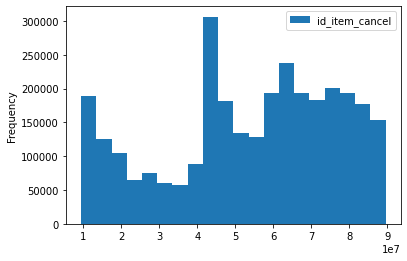

In [ ]:
ndf10_orders['id_item_cancel'].plot(kind = 'hist', bins = 20, legend = True) 

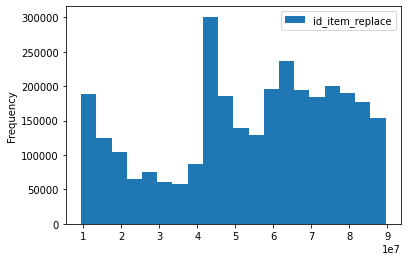

In [ ]:
ndf10_orders['id_item_replace'].plot(kind = 'hist', bins = 20, legend = True)